# Exploring Target Variables
In order to evaluate performance of our models we should have a good understanding of the target variables and whether they differ. Certain performance measures and errors (particularly squared errors) are effected significantly by changes in the range of the mean and range of the target variables. The intent here is to have a look at this variance to understand its impact.

In [7]:
from spectroscopy import LeafSampleReader
from spectroscopy.src.utility_functions import get_working_directory
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spectroscopy.src.constants import ELEMENT_COLUMNS

working_directory_path = get_working_directory()
leaf_samples_folder_path = f"{working_directory_path}/data/leaf_samples"
leaf_sample_reader = LeafSampleReader(leaf_samples_folder_path)
leaf_df = leaf_sample_reader.read_all_csvs()

In [8]:
df = leaf_df[[col for col in leaf_df.columns if "nm" not in col]]
el = pd.read_csv(f"{working_directory_path}/data/element_groups.csv")
el_pct = el[el["units"]=="pct"]["nutrient"].to_list()
el_ppm = el[el["units"]=="ppm"]["nutrient"].to_list()
el_g1 = el[el["group"]==1]["nutrient"].to_list()
el_g2 = el[el["group"]==2]["nutrient"].to_list()
el_micro = el[el["type"]=="micro"]["nutrient"].to_list()
el_macro = el[el["type"]=="macro"]["nutrient"].to_list()

In [9]:
df_long = pd.melt(df, id_vars=["leaf_state","season"], value_vars=ELEMENT_COLUMNS, var_name="nutrient", value_name="value")
invalid_indexes = df_long.index[pd.to_numeric(df_long['value'], errors="coerce").isna()]
df_long = df_long.drop(invalid_indexes)
df_long["value"] = df_long["value"].astype(float)

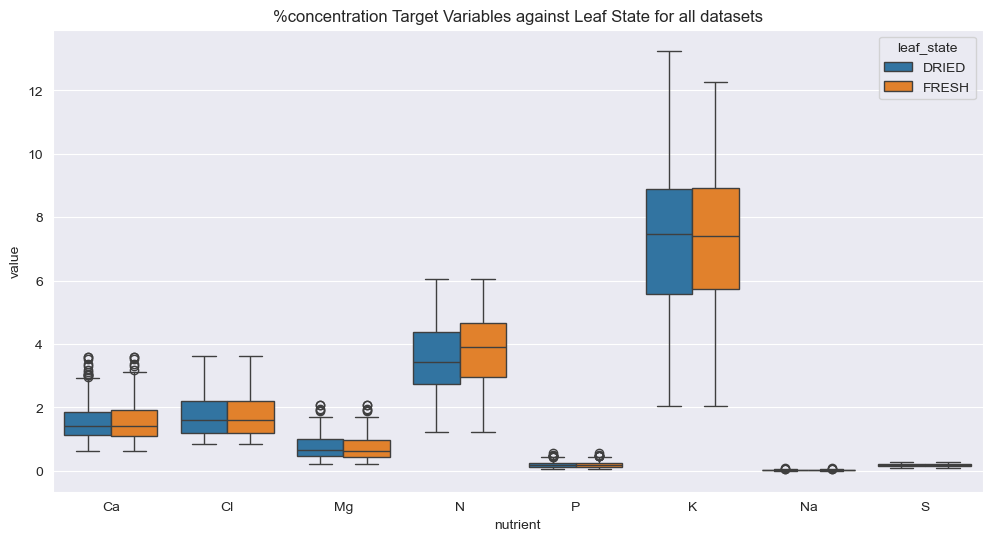

In [12]:
# Compare %-based leaf_state targets
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df_long[df_long["nutrient"].isin(el_pct)], x="nutrient", y="value", hue="leaf_state")
plt.title("%concentration Target Variables against Leaf State for all datasets")
plt.show()

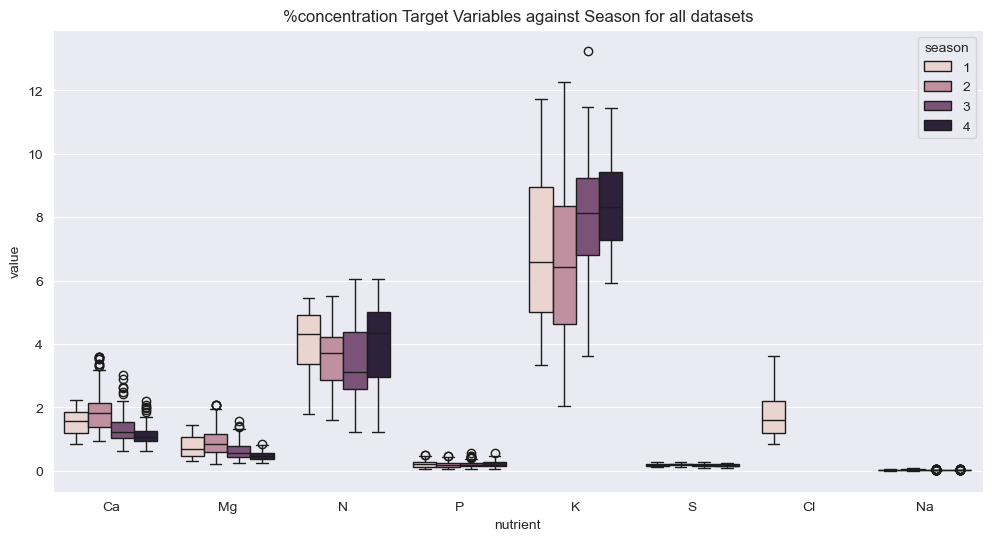

In [5]:
# Compare %-based season targets
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df_long[df_long["nutrient"].isin(el_pct)], x="nutrient", y="value", hue="season")
plt.title("%concentration Target Variables against Season for all datasets")
plt.show()

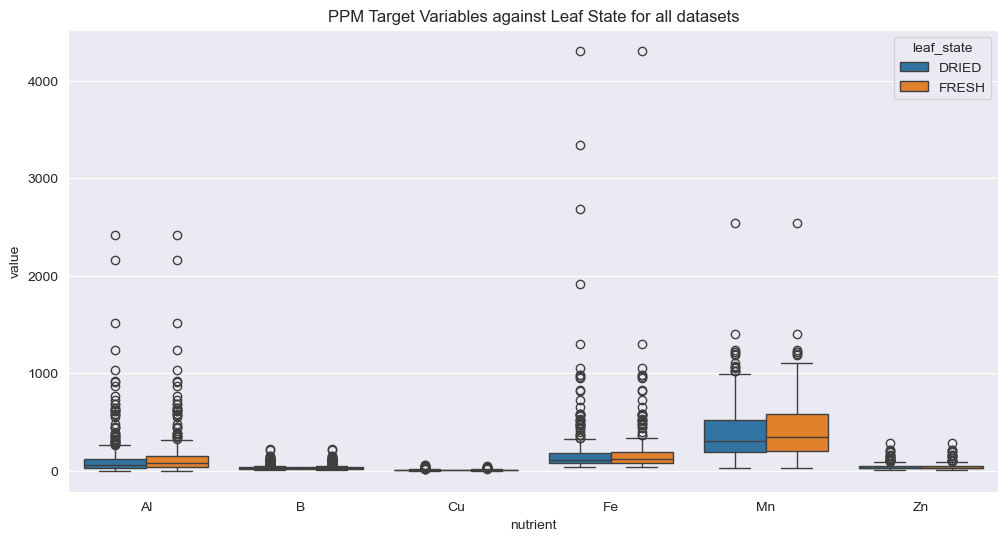

In [13]:
# Compare ppm-based leaf_state targets
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df_long[df_long["nutrient"].isin(el_ppm)], x="nutrient", y="value", hue="leaf_state")
plt.title("PPM Target Variables against Leaf State for all datasets")
plt.show()

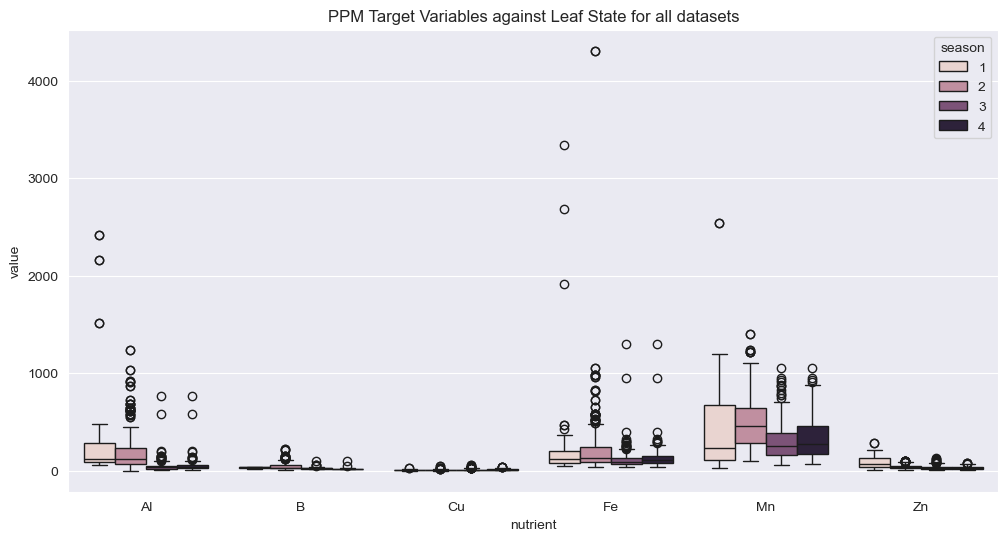

In [14]:
# Compare ppm-based season targets
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df_long[df_long["nutrient"].isin(el_ppm)], x="nutrient", y="value", hue="season")
plt.title("PPM Target Variables against Leaf State for all datasets")
plt.show()